In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
import keras
from tensorflow.keras.optimizers import Adam, Adagrad, Adamax, RMSprop, SGD, Adadelta
import matplotlib.pyplot as plt
import numpy as np
from keras import layers

In [2]:
dataset, dataset_info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
dataset_info

test_set, training_set, validation_set = dataset['test'], dataset['train'], dataset['validation']

In [3]:
for i, example in enumerate(training_set.take(3)):
  print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))

Image 1 shape: (500, 667, 3) label: 72
Image 2 shape: (500, 666, 3) label: 84
Image 3 shape: (670, 500, 3) label: 70


2023-02-27 03:02:17.963891: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [5]:
IMAGE_RES = 224

def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

train_batches = training_set.cache().shuffle(1020//4).map(format_image).batch(BATCH_SIZE).prefetch(1)

# validation_batches = validation_set.cache().map(format_image).batch(BATCH_SIZE).prefetch(1)

test_batches = test_set.cache().map(format_image).batch(BATCH_SIZE).prefetch(1)
# train

In [6]:
import tensorflow_hub as hub

URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES, 3))



In [7]:
# Adam Optimizer for Oxford Flowers Dataset

model_adam_flower = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(102, activation='softmax')
])

model_adam_flower.summary()

model_adam_flower.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history_adam_flower = model_adam_flower.fit(train_batches,
                    epochs=30,
                    validation_data=validation_batches)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/30
32/32 [==============================] - 13s 343ms/step - loss: 4.2591 - accuracy: 0.1196 - val_loss: 3.0871 - val_accuracy: 0.3735
Epoch 2/30
32/32 [==============================] - 10s 331ms/step - loss: 2.0771 - accuracy: 0.6765 - val_loss: 1.9852 - val_accuracy: 0.6598
Epoch 3/30
32/32 [==============================] - 10s 326ms/step - loss: 1.1087 - accuracy: 0.9020 - val_loss: 1.5283 - val_accuracy: 0.7245
Epoch 4

In [8]:
# Adadelta Optimizer for Oxford Flowers Dataset

model_adadelta_flower = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(102, activation='softmax')
])

model_adadelta_flower.summary()

model_adadelta_flower.compile(optimizer='adadelta',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history_adadelta_flower = model_adadelta_flower.fit(train_batches,
                    epochs=30,
                    validation_data=validation_batches)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 102)               130662    
                                                                 
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/30
32/32 [==============================] - 1055s 34s/step - loss: 5.1084 - accuracy: 0.0078 - val_loss: 5.0653 - val_accuracy: 0.0088
Epoch 2/30
32/32 [==============================] - 1016s 33s/step - loss: 5.1023 - accuracy: 0.0078 - val_loss: 5.0601 - val_accuracy: 0.0088
Epoch 3/30
32/32 [==============================] - 10s 312ms/step - loss: 5.0965 - accuracy: 0.0078 - val_loss: 5.0549 - val_accuracy: 0.0088
Epoch

In [9]:
# Adamax Optimizer for Oxford Flowers Dataset

model_adamax_flower = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(102, activation='softmax')
])

model_adamax_flower.summary()

model_adamax_flower.compile(optimizer='adamax',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history_adamax_flower = model_adamax_flower.fit(train_batches,
                    epochs=30,
                    validation_data=validation_batches)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 102)               130662    
                                                                 
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/30
32/32 [==============================] - 11s 325ms/step - loss: 4.6342 - accuracy: 0.0461 - val_loss: 3.8914 - val_accuracy: 0.1706
Epoch 2/30
32/32 [==============================] - 10s 315ms/step - loss: 3.3394 - accuracy: 0.3686 - val_loss: 3.2275 - val_accuracy: 0.3637
Epoch 3/30
32/32 [==============================] - 11s 343ms/step - loss: 2.6204 - accuracy: 0.5971 - val_loss: 2.7541 - val_accuracy: 0.4961
Epoch

In [10]:
# Adagrad Optimizer for Oxford Flowers Dataset

model_adagrad_flower = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(102, activation='softmax')
])

model_adagrad_flower.summary()

model_adagrad_flower.compile(optimizer='adagrad',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history_adagrad_flower = model_adagrad_flower.fit(train_batches,
                    epochs=30,
                    validation_data=validation_batches)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 102)               130662    
                                                                 
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/30
32/32 [==============================] - 10s 315ms/step - loss: 5.0121 - accuracy: 0.0069 - val_loss: 4.9296 - val_accuracy: 0.0078
Epoch 2/30
32/32 [==============================] - 9s 298ms/step - loss: 4.8436 - accuracy: 0.0069 - val_loss: 4.8044 - val_accuracy: 0.0137
Epoch 3/30
32/32 [==============================] - 10s 302ms/step - loss: 4.7146 - accuracy: 0.0147 - val_loss: 4.7037 - val_accuracy: 0.0186
Epoch 

In [11]:
# RMSprop Optimizer for Oxford Flowers Dataset

model_rms_flower = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(102, activation='softmax')
])

model_rms_flower.summary()

model_rms_flower.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history_rms_flower = model_rms_flower.fit(train_batches,
                    epochs=30,
                    validation_data=validation_batches)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_4 (Dense)             (None, 102)               130662    
                                                                 
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/30
32/32 [==============================] - 10s 308ms/step - loss: 4.0626 - accuracy: 0.1510 - val_loss: 2.8615 - val_accuracy: 0.4510
Epoch 2/30
32/32 [==============================] - 10s 327ms/step - loss: 1.9920 - accuracy: 0.6912 - val_loss: 1.9407 - val_accuracy: 0.6373
Epoch 3/30
32/32 [==============================] - 13s 423ms/step - loss: 1.0631 - accuracy: 0.8922 - val_loss: 1.4578 - val_accuracy: 0.7078
Epoch

In [12]:
# SGD Optimizer for Oxford Flowers Dataset

model_sgd_flower = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(102, activation='softmax')
])

model_sgd_flower.summary()

model_sgd_flower.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history_sgd_flower = model_sgd_flower.fit(train_batches,
                    epochs=30,
                    validation_data=validation_batches)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_5 (Dense)             (None, 102)               130662    
                                                                 
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/30
32/32 [==============================] - 10s 307ms/step - loss: 4.8496 - accuracy: 0.0118 - val_loss: 4.6181 - val_accuracy: 0.0206
Epoch 2/30
32/32 [==============================] - 10s 312ms/step - loss: 4.4210 - accuracy: 0.0559 - val_loss: 4.3084 - val_accuracy: 0.0627
Epoch 3/30
32/32 [==============================] - 10s 305ms/step - loss: 4.0767 - accuracy: 0.1216 - val_loss: 4.0418 - val_accuracy: 0.1245
Epoch

<Figure size 1800x1200 with 0 Axes>

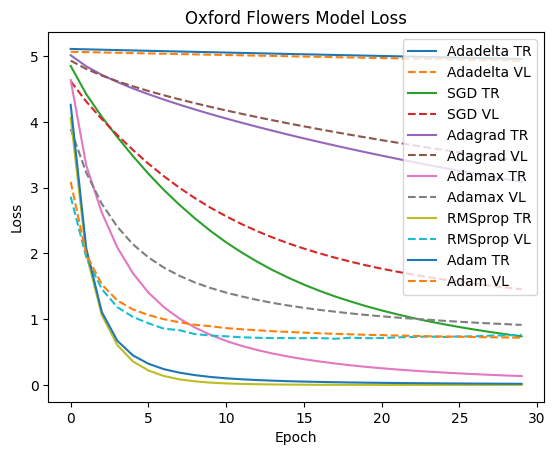

<Figure size 1800x1200 with 0 Axes>

In [20]:
plt.plot(history_adadelta_flower.history['loss'], label = 'Adadelta TR')
plt.plot(history_adadelta_flower.history['val_loss'],linestyle="--",label = 'Adadelta VL')

plt.plot(history_sgd_flower.history['loss'], label = 'SGD TR')
plt.plot(history_sgd_flower.history['val_loss'], linestyle="--", label = 'SGD VL')

plt.plot(history_adagrad_flower.history['loss'], label = 'Adagrad TR')
plt.plot(history_adagrad_flower.history['val_loss'], linestyle="--", label = 'Adagrad VL')

plt.plot(history_adamax_flower.history['loss'], label = 'Adamax TR')
plt.plot(history_adamax_flower.history['val_loss'], linestyle="--", label = 'Adamax VL')

plt.plot(history_rms_flower.history['loss'], label = 'RMSprop TR')
plt.plot(history_rms_flower.history['val_loss'], linestyle="--",  label = 'RMSprop VL')

plt.plot(history_adam_flower.history['loss'], label = 'Adam TR')
plt.plot(history_adam_flower.history['val_loss'], linestyle="--", label ='Adam VL')

plt.title('Oxford Flowers Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.figure(figsize=(18, 12))
# plt.savefig('oxford_result.png')
# plt.show()

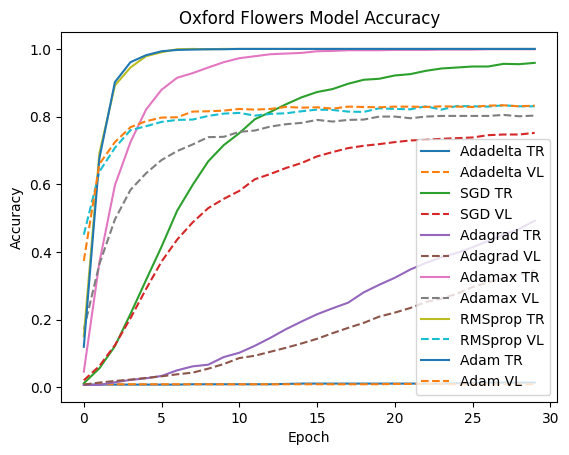

<Figure size 1800x1200 with 0 Axes>

In [17]:
# plt.plot(history_adadelta_flower.history['accuracy'], label = 'Adadelta TR')
# plt.plot(history_adadelta_flower.history['val_accuracy'],linestyle="--",label = 'Adadelta VL')

# plt.plot(history_sgd_flower.history['accuracy'], label = 'SGD TR')
# plt.plot(history_sgd_flower.history['val_accuracy'], linestyle="--", label = 'SGD VL')

# plt.plot(history_adagrad_flower.history['accuracy'], label = 'Adagrad TR')
# plt.plot(history_adagrad_flower.history['val_accuracy'], linestyle="--", label = 'Adagrad VL')

# plt.plot(history_adamax_flower.history['accuracy'], label = 'Adamax TR')
# plt.plot(history_adamax_flower.history['val_accuracy'], linestyle="--", label = 'Adamax VL')

# plt.plot(history_rms_flower.history['accuracy'], label = 'RMSprop TR')
# plt.plot(history_rms_flower.history['val_accuracy'], linestyle="--",  label = 'RMSprop VL')

# plt.plot(history_adam_flower.history['accuracy'], label = 'Adam TR')
# plt.plot(history_adam_flower.history['val_accuracy'], linestyle="--", label ='Adam VL')

# plt.title('Oxford Flowers Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend()
# plt.figure(figsize=(18, 12))
# # plt.savefig('caltech_result.png')
# plt.show()